# K-Means - Exploration

In [29]:
# Import Packages and Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Import Dataset 

housing = pd.read_csv('/workspaces/gustavolima-kmeans/data/raw/main_housing.csv')
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##### Clean Dataset for Kmeans Purpose

In [31]:
# Clean the DataSet
housing = housing[['MedInc', 'Latitude', 'Longitude']]

In [32]:
# Check new DataFrame  
housing.shape

(20640, 3)

##### Split the Data for Modelling

In [33]:
# Split the DataSet 
from sklearn.model_selection import train_test_split
X = housing

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

#### K-Means Model

In [34]:
# K-Means Model
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, n_init='auto', random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [35]:
y_train = list(model.labels_)
X_train["Cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


##### Plot the Data

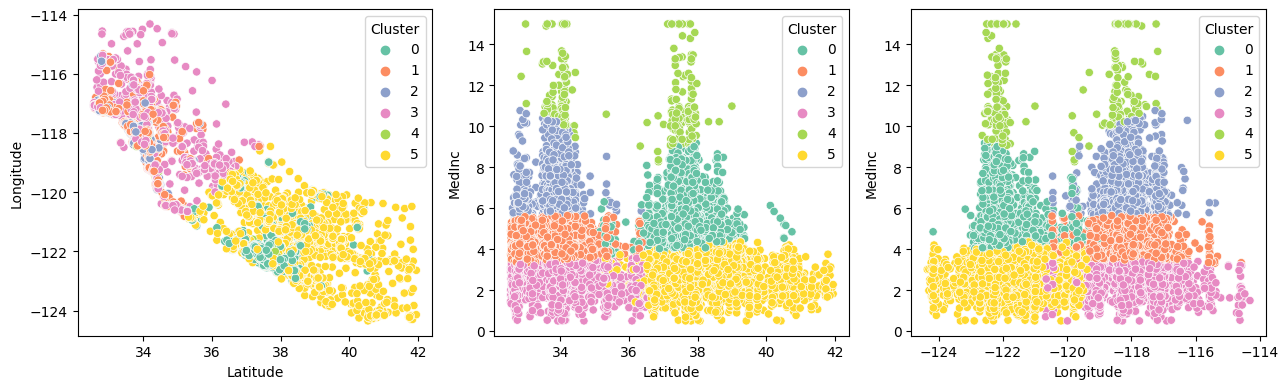

In [37]:
# Plot the Data into Dotplot

fig, axis = plt.subplots(1, 3, figsize=(13, 4))

# Plot the data
sns.scatterplot(ax=axis[0], data=X_train, x='Latitude', y='Longitude', hue='Cluster', palette='Set2')
sns.scatterplot(ax=axis[1], data=X_train, x='Latitude', y='MedInc', hue='Cluster', palette='Set2')
sns.scatterplot(ax=axis[2], data=X_train, x='Longitude', y='MedInc', hue='Cluster', palette='Set2')

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

Looking at the data from MedInc vs Lat and Vs Long we can say that our data is a Normal Distribution. 

#### Predict the Model

In [39]:
y_test = list(model.predict(X_test))
X_test["Cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


##### Plot both Data

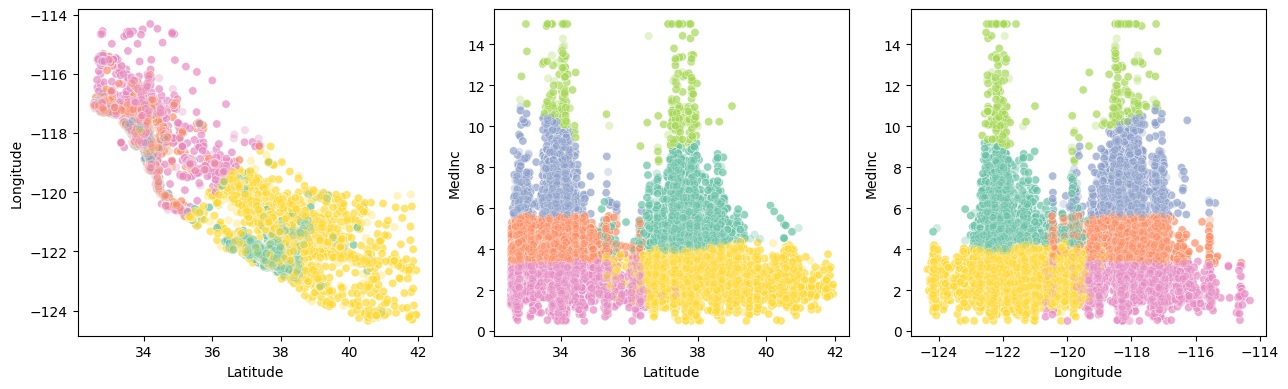

In [42]:
# Plot the Data into Dotplot

fig, axis = plt.subplots(1, 3, figsize=(13, 4))

# Plot the data
sns.scatterplot(ax=axis[0], data=X_train, x='Latitude', y='Longitude', hue='Cluster', palette='Set2', alpha=0.7, legend=False)
sns.scatterplot(ax=axis[1], data=X_train, x='Latitude', y='MedInc', hue='Cluster', palette='Set2', alpha=0.7, legend=False)
sns.scatterplot(ax=axis[2], data=X_train, x='Longitude', y='MedInc', hue='Cluster', palette='Set2', alpha=0.7, legend=False)

sns.scatterplot(ax=axis[0], data=X_test, x='Latitude', y='Longitude', hue='Cluster', palette='Set2', alpha=0.3, legend=False)
sns.scatterplot(ax=axis[1], data=X_test, x='Latitude', y='MedInc', hue='Cluster', palette='Set2', alpha=0.3, legend=False)
sns.scatterplot(ax=axis[2], data=X_test, x='Longitude', y='MedInc', hue='Cluster', palette='Set2', alpha=0.3, legend=False)

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()